In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import re
import random
import datetime

#URLs of the three CSVs
properties_url = r'/Users/santwana/Desktop/testing/Crime_Data_from_2010_to_Present.csv'
ds = pd.read_csv(str(properties_url), low_memory = False)
print(ds.head(3))

   DR Number Date Reported Date Occurred  Time Occurred  Area ID    Area Name  \
0    1208575    03/14/2013    03/11/2013           1800       12  77th Street   
1  102005556    01/25/2010    01/22/2010           2300       20      Olympic   
2        418    03/19/2013    03/18/2013           2030       18    Southeast   

   Reporting District  Crime Code             Crime Code Description  \
0                1241         626  INTIMATE PARTNER - SIMPLE ASSAULT   
1                2071         510                   VEHICLE - STOLEN   
2                1823         510                   VEHICLE - STOLEN   

              MO Codes          ...           \
0  0416 0446 1243 2000          ...            
1                  NaN          ...            
2                  NaN          ...            

                               Weapon Description Status Code  \
0  STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)          AO   
1                                             NaN          IC  

In [9]:
print("length of ds :",len(ds))
ds2 = ds[['DR Number','Area Name','Location ']]
print(ds2.head(2))

length of ds : 1709541
   DR Number    Area Name             Location 
0    1208575  77th Street  (33.9829, -118.3338)
1  102005556      Olympic  (34.0454, -118.3157)


In [10]:
def get_distance(lat1, long1, lat2, long2):
    # approximate radius of earth in km
    R = 6373.0
#     print(" lat,long : ",lat1, long1, lat2, long2)
    lat1 = np.radians(lat1)
    long1 = np.radians(long1)
    lat2 = np.radians(lat2)
    long2 = np.radians(long2)

    dlong = long2 - long1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong / 2)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    meters = km * 1000
    return meters
    #meters = str(meters).split('.')[0]
    #return int(meters)



In [11]:
def get_lat_long(location):
    list_loc = str(location).strip('(),')
    loc1 = list_loc.split(',')
    if(len(loc1) is not 2):
        return -1,-1
    lat1 = loc1[0]
    long1 = loc1[1].strip()
    lat1 = float(lat1)
    long1 = float(long1)
    return lat1,long1

In [12]:
from scipy.interpolate import UnivariateSpline
#from matplotlib import pyplot as plt
import matplotlib.pyplot as pl
import matplotlib.pyplot as plt
from matplotlib import pyplot as pls
from numpy import linspace
from scipy.stats.kde import gaussian_kde
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt9

def plot_for_area(area_name,popular_area_location):
    print("In plot for area")
    df_area = ds2[ds2['Area Name']  == area_name].copy()
    pop_lat,pop_long = get_lat_long(popular_area_location)
#     print(df_area)
#     print(pop_lat,pop_long)
    print()
    distance = list()
    loc = df_area['Location ']
    for location in loc:
        lat_loc,long_loc = get_lat_long(location)
        if(lat_loc is -1):
            continue
        dist_temp = get_distance(pop_lat,pop_long,lat_loc,long_loc)
        if(dist_temp > 40000):
            continue
        distance.append(dist_temp)
    print("distance")
    pl.xlabel(area_name)
    pl.ylabel('crime')
    pl.hist(distance, bins = 500, facecolor = 'green', alpha = 0.75)
    pl.axis([400, 20000, 0, 3000])
    pl.grid(True)
    print("plot for area finished")
    filename = "/Users/santwana/Desktop/testing/Plots1/" + area_name + ".png"
    plt.savefig(filename)
    plt.show()
    
    std_dev1 = np.std(distance, ddof = 0)
    print("std_dev1 is:", std_dev1)

    mean1 = np.mean(distance)
    print("mean1 is:", mean1) 

    kde = gaussian_kde( distance )
    # these are the values over wich your kernel will be evaluated
    dist_space = linspace( min(distance), max(distance), 100 )
    # plot the results
    plt.plot( dist_space, kde(dist_space) )

#     n, bins, patches = pl.hist(distance, 500, normed = 10, facecolor ='green', alpha = 0.75)
    filename1 = "/Users/santwana/Desktop/testing/Plots1/PDF/" + area_name + ".png"
    plt.savefig(filename1)
    plt.show()
    
    sorted_distance = np.sort(distance)
    p = 1. * np.arange(len(sorted_distance))/(len(sorted_distance) - 1)
    pls.plot(sorted_distance, p)
    filename4 = "/Users/santwana/Desktop/testing/Plots1/CDF/" + area_name + ".png"
    pl.savefig(filename4)
    pls.show()

    return distance   



OLYMPIC LENGTH:  75957
HOLLYWOOD LENGTH:  78184
Ks_2sampResult(statistic=0.45817036943604217, pvalue=0.0)


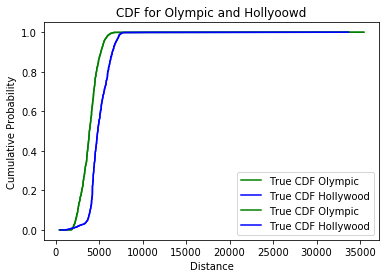

In [14]:
from scipy.stats import ks_2samp
import pylab 
def KS_test(area_name,popular_area_location):
    df_area = ds2[ds2['Area Name']  == area_name].copy()
    pop_lat,pop_long = get_lat_long(popular_area_location)
#     print(df_area)
#     print(pop_lat,pop_long)
    print()
    distance = list()
    loc = df_area['Location ']
   
    for location in loc:
        lat_loc,long_loc = get_lat_long(location)
        if(lat_loc is -1):
            continue
        dist_temp = get_distance(pop_lat,pop_long,lat_loc,long_loc)
        
        if(dist_temp > 40000):
            continue
        distance.append(dist_temp)
    return distance 

df_Olympic = KS_test("Olympic", "34.044736, -118.264549")
df_Hollywood = KS_test("Hollywood", "34.136518, -118.356051")
# print("OLYMPIC:",df_Olympic)
print("OLYMPIC LENGTH: ", len(df_Olympic))
# print("HOLLYWOOD",df_Hollywood)
print("HOLLYWOOD LENGTH: ", len(df_Hollywood))
print(ks_2samp(df_Olympic, df_Hollywood))

from matplotlib import pyplot as pls
sorted_df_Olympic = np.sort(df_Olympic)
sorted_df_Hollywood = np.sort(df_Hollywood) 
p1 = 1. * np.arange(len(sorted_df_Olympic))/(len(sorted_df_Olympic) - 1)
pls.plot(sorted_df_Olympic, p1, 'g', label='True CDF Olympic')
p2 = 1. * np.arange(len(sorted_df_Hollywood))/(len(sorted_df_Hollywood) - 1)
pls.plot(sorted_df_Hollywood, p2, 'blue', label='True CDF Hollywood')
pls.xlabel("Distance")
pls.ylabel("Cumulative Probability")

pls.title("CDF for Olympic and Hollyoowd")
pylab.legend(loc = 'lower right')
filenamecdfs = "/Users/santwana/Desktop/testing/Plots1/CDF/ComparingHollywood&Olympic.png"
pls.savefig(filenamecdfs)
pls.show()

In [15]:
from scipy.stats import ks_2samp

def KS_test(area_name,popular_area_location):
    df_area = ds2[ds2['Area Name']  == area_name].copy()
    pop_lat,pop_long = get_lat_long(popular_area_location)
#     print(df_area)
#     print(pop_lat,pop_long)
    print()
    distance = list()
    loc = df_area['Location ']
   
    for location in loc:
        lat_loc,long_loc = get_lat_long(location)
        if(lat_loc is -1):
            continue
        dist_temp = get_distance(pop_lat,pop_long,lat_loc,long_loc)
        
        if(dist_temp > 40000):
            continue
        distance.append(dist_temp)
    return distance 

df_Southeast = KS_test("Southeast", "33.9, -118.166667")
df_Wilshire = KS_test("Wilshire", "34.05, -118.2593")
# print("Southeast:",df_Southeast)
print("Southeast LENGTH: ", len(df_Southeast))
# print("HOLLYWOOD",df_Southeast)
print("Wilshire LENGTH: ", len(df_Wilshire))
print(ks_2samp(df_Southeast, df_Wilshire))



Southeast LENGTH:  89548
Wilshire LENGTH:  69063
Ks_2sampResult(statistic=0.39857945418040469, pvalue=0.0)



std_dev_total is: 1078.12486692
mean_total is: 3877.94768457
length :  1709541
starteding process
data :  ['77th Street', '33.938739, -118.241047']
In plot for area

distance
plot for area finished


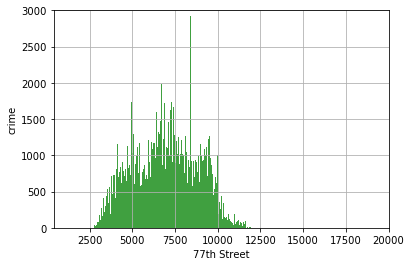

std_dev1 is: 1879.97058475
mean1 is: 6970.69098302


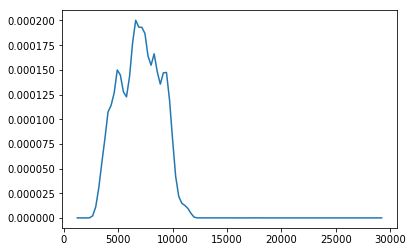

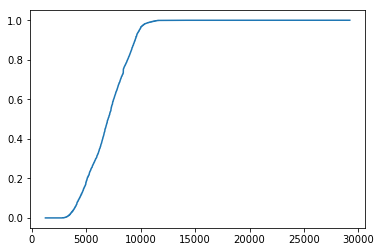

77th Street finished
data :  ['Olympic', '34.044736, -118.264549']
In plot for area

distance
plot for area finished


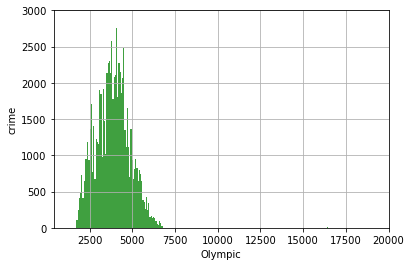

std_dev1 is: 1078.12486692
mean1 is: 3877.94768457


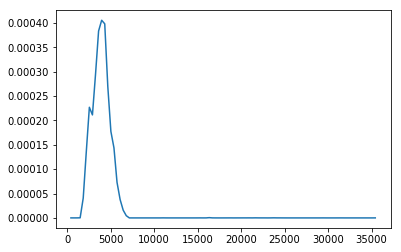

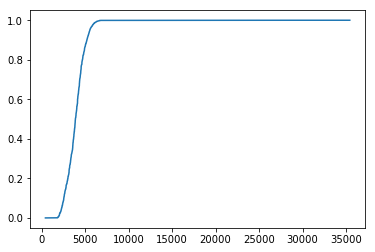

Olympic finished
data :  ['Central', '34.1, -118.333333']
In plot for area

distance
plot for area finished


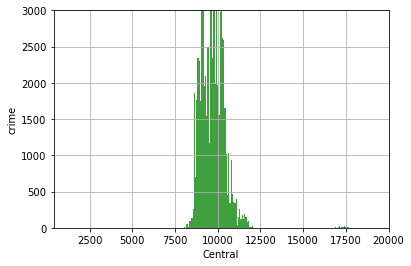

std_dev1 is: 1046.81109137
mean1 is: 9747.13473601


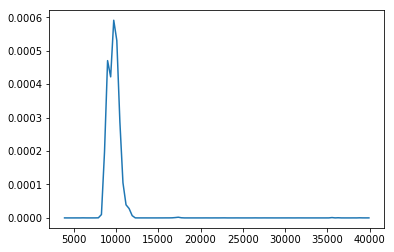

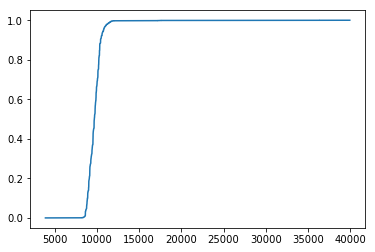

Central finished
data :  ['Southeast', '33.9, -118.166667']
In plot for area

distance
plot for area finished


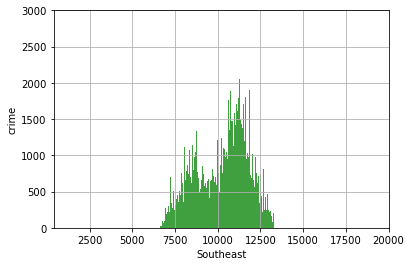

std_dev1 is: 1544.31354115
mean1 is: 10309.8010849


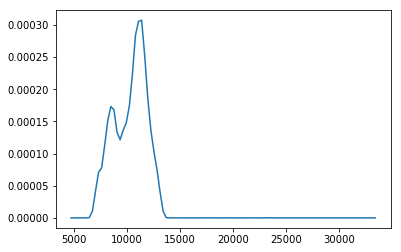

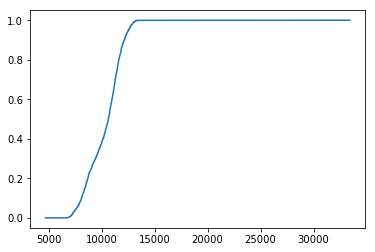

Southeast finished
data :  ['Topanga', '34.045053, -118.563824']
In plot for area

distance
plot for area finished


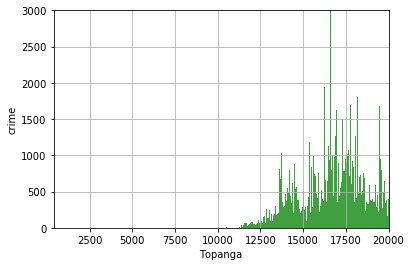

std_dev1 is: 2068.02467436
mean1 is: 16927.2383206


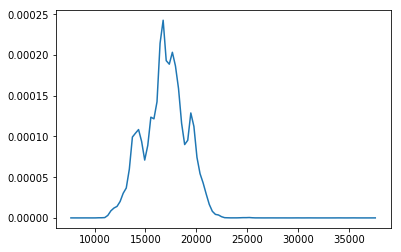

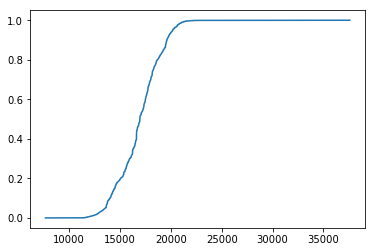

Topanga finished
data :  ['Northeast', '34.11194, -118.19806']
In plot for area

distance
plot for area finished


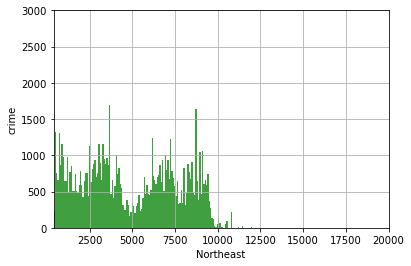

std_dev1 is: 2907.33833312
mean1 is: 4820.35194355


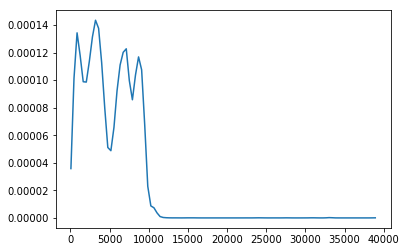

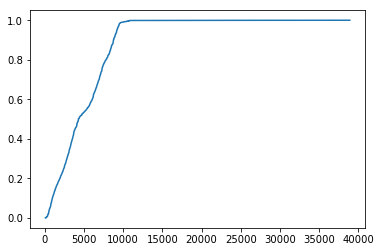

Northeast finished
data :  ['Foothill', '34.140635, -118.044354']
In plot for area

distance
plot for area finished


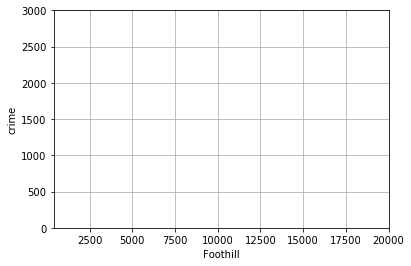

std_dev1 is: 3986.38842453
mean1 is: 33150.0191084


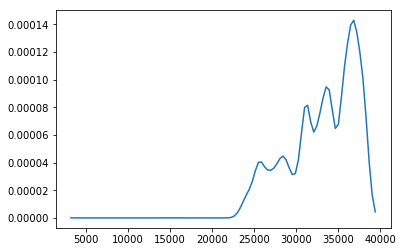

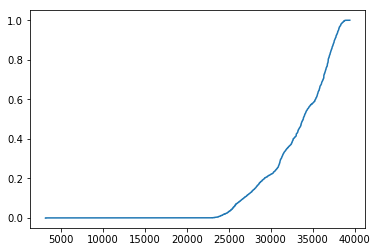

Foothill finished
data :  ['Mission', '34.22472, -118.44889']
In plot for area

distance
plot for area finished


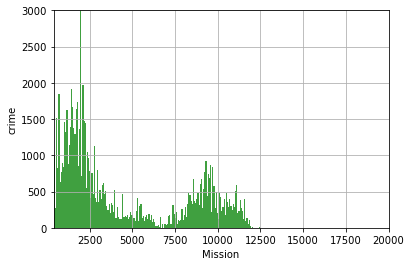

std_dev1 is: 3626.11115979
mean1 is: 4245.66314325


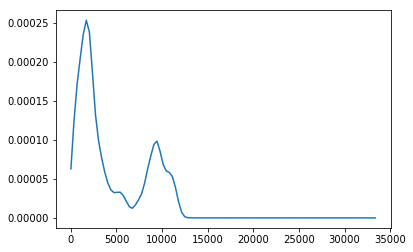

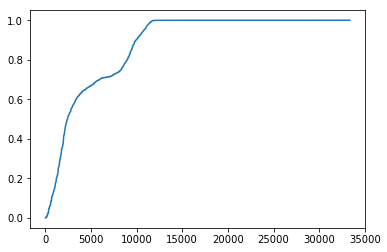

Mission finished
data :  ['Van Nuys', '34.20114, -118.50113']
In plot for area

distance
plot for area finished


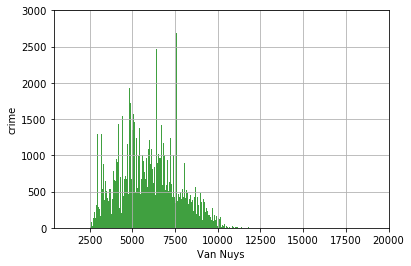

std_dev1 is: 1733.7469074
mean1 is: 5974.81481421


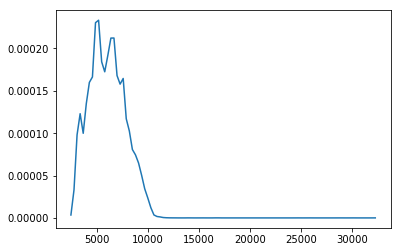

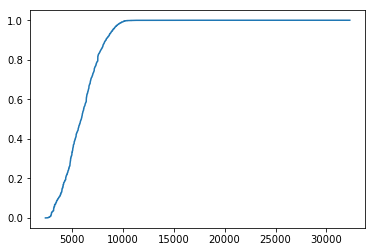

Van Nuys finished
data :  ['Newton', '34.037168, -118.256404']
In plot for area

distance
plot for area finished


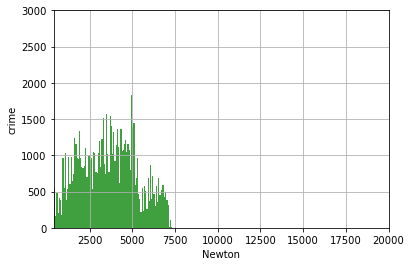

std_dev1 is: 1745.19426148
mean1 is: 3633.26549392


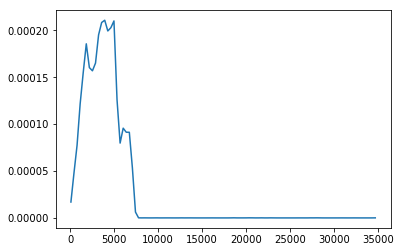

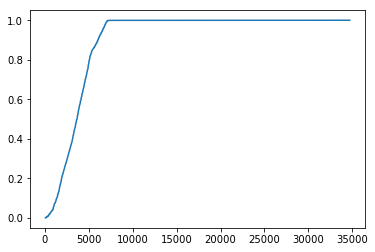

Newton finished
data :  ['Hollywood', '34.136518, -118.356051']
In plot for area

distance
plot for area finished


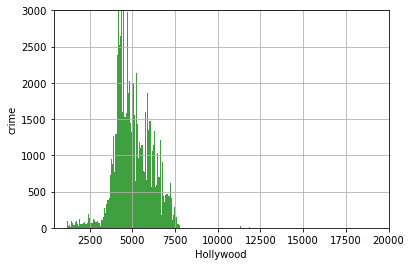

std_dev1 is: 1104.72637411
mean1 is: 5011.6226491


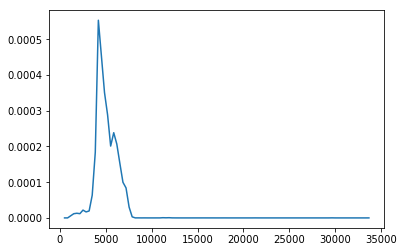

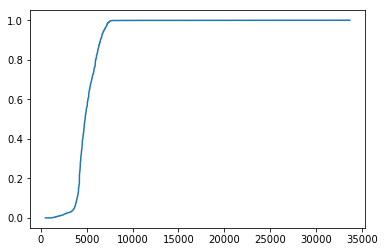

Hollywood finished
data :  ['Rampart', '34.0792, -118.258']
In plot for area

distance
plot for area finished


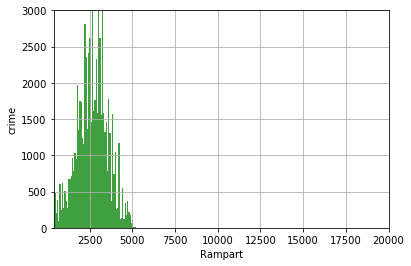

std_dev1 is: 1001.33171417
mean1 is: 2681.95868192


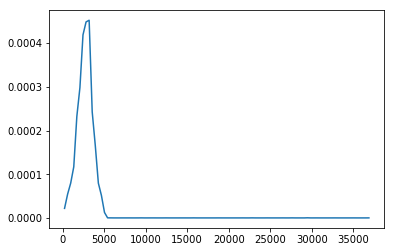

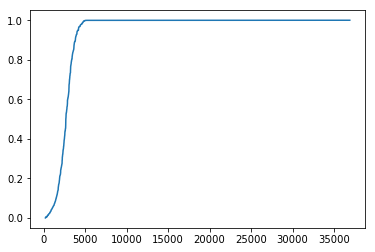

Rampart finished
data :  ['N Hollywood', '34.1919 , -118.4011']
In plot for area

distance
plot for area finished


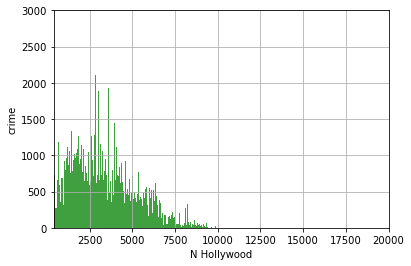

std_dev1 is: 1906.9552857
mean1 is: 3382.25898962


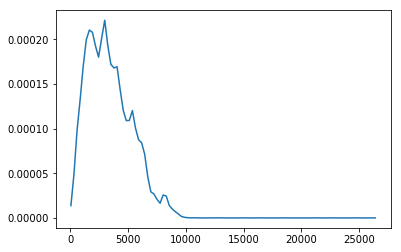

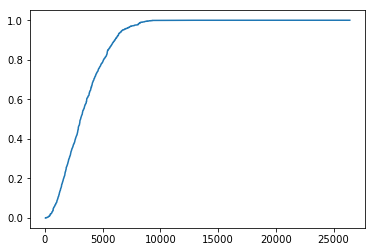

N Hollywood finished
data :  ['West Valley', '34.179084, -118.413782']
In plot for area

distance
plot for area finished


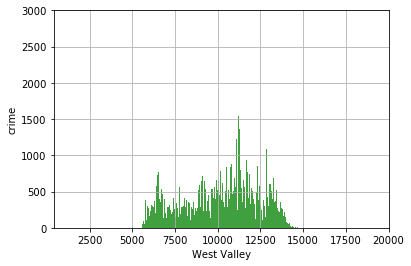

std_dev1 is: 2213.89367757
mean1 is: 10154.3427126


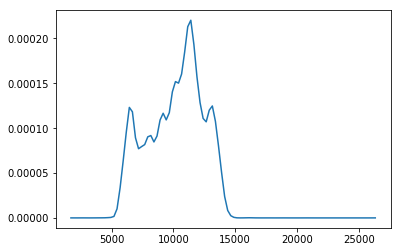

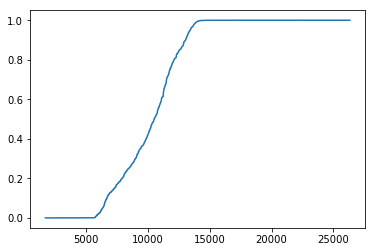

West Valley finished
data :  ['Pacific', '34.042738, -118.55235']
In plot for area

distance
plot for area finished


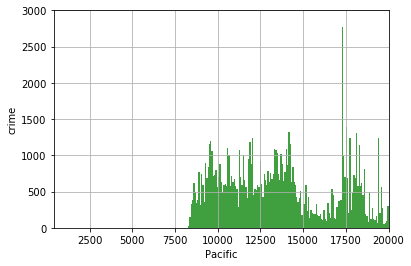

std_dev1 is: 3255.01145565
mean1 is: 13654.5555159


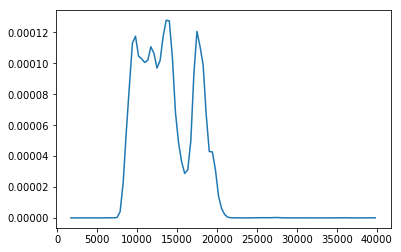

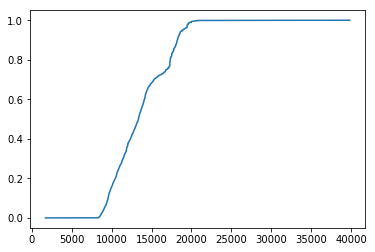

Pacific finished
data :  ['Devonshire', '34.2582, -118.5392']
In plot for area

distance
plot for area finished


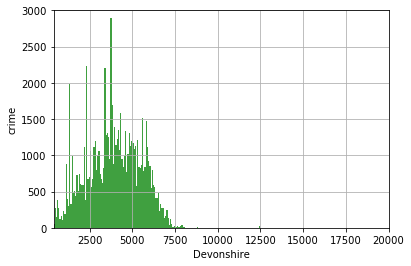

std_dev1 is: 1620.29393603
mean1 is: 3868.83748562


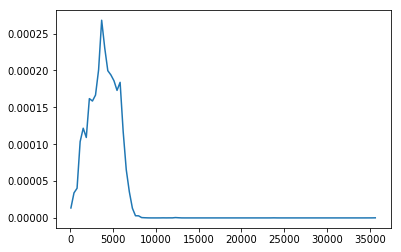

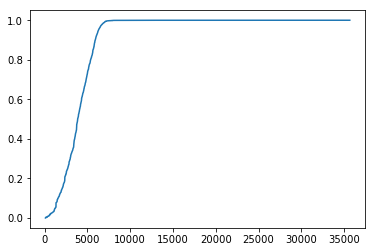

Devonshire finished
data :  ['Harbor', '33.729186, -118.262015']
In plot for area

distance
plot for area finished


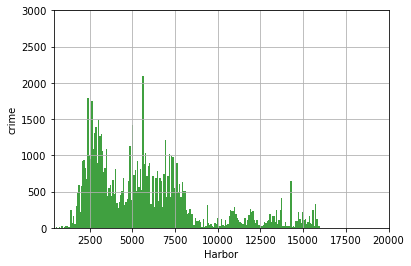

std_dev1 is: 3427.11843731
mean1 is: 5861.79905876


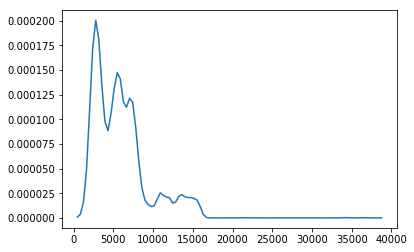

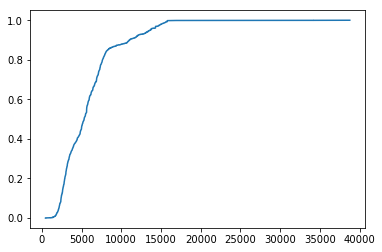

Harbor finished
data :  ['Hollenbeck', '34.039956, -118.21804']
In plot for area

distance
plot for area finished


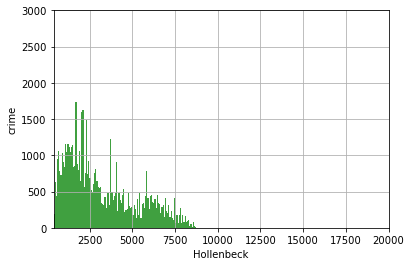

std_dev1 is: 2116.9685341
mean1 is: 3136.69938757


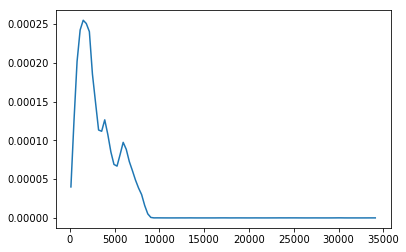

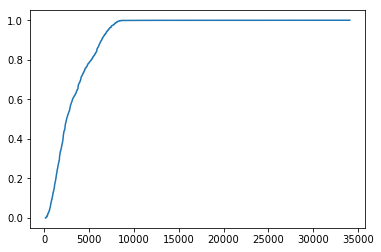

Hollenbeck finished
data :  ['West LA', '34.0380, -118.4532']
In plot for area

distance
plot for area finished


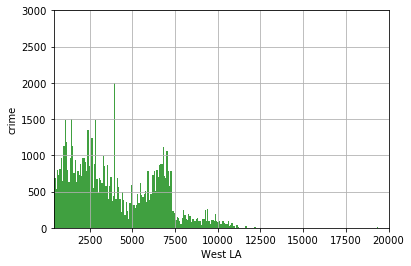

std_dev1 is: 2513.59119674
mean1 is: 3966.7236388


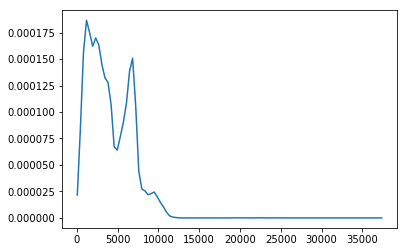

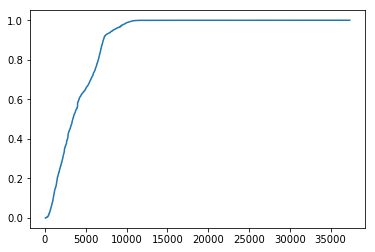

West LA finished
data :  ['Wilshire', '34.05, -118.2593']
In plot for area

distance
plot for area finished


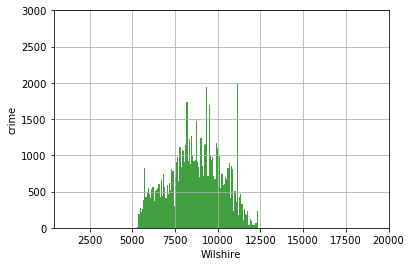

std_dev1 is: 1630.46916075
mean1 is: 8729.78402489


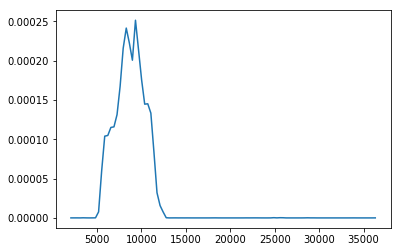

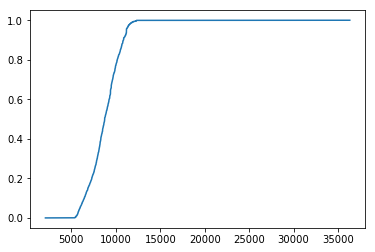

Wilshire finished
[9857.3663616689137, 4513.6657117490786, 4313.7825255093558, 4513.6657117490786, 4934.5771322794062]


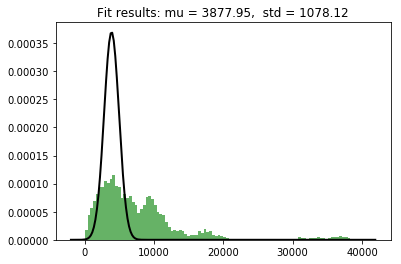

In [19]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plotOLy

def get_dist(area_name,popular_area_location):
    df_area = ds2[ds2['Area Name']  == area_name].copy()
    pop_lat,pop_long = get_lat_long(popular_area_location)
#     print(df_area)
#     print(pop_lat,pop_long)
    print()
    distance = list()
    loc = df_area['Location ']
   
    for location in loc:
        lat_loc,long_loc = get_lat_long(location)
        if(lat_loc is -1):
            continue
        dist_temp = get_distance(pop_lat,pop_long,lat_loc,long_loc)
        
        if(dist_temp > 40000):
            continue
        distance.append(dist_temp)
    return distance 

dist = get_dist("Olympic", "34.044736, -118.264549")

std_dev_O = np.std(dist, ddof = 0)
print("std_dev_total is:", std_dev_O)

mean_O = np.mean(dist)
print("mean_total is:", mean_O)
# Fit a normal distribution to the data:
mu, std = norm.fit(dist)

area = ds2["Area Name"]
# area = str(area)
loc = ds2["Location "]
print("length : ", len(loc))
# print("length of ds2 : ",len(ds2))
# print("area length",len(area))
#print("loaction is dchjsgchsdbjchsdb",loc)
# print(ds2["Area Name"])

Data = [["77th Street","33.938739, -118.241047"],["Olympic","34.044736, -118.264549"],["Central","34.1, -118.333333"],["Southeast","33.9, -118.166667"],["Topanga","34.045053, -118.563824"],["Northeast","34.11194, -118.19806"],["Foothill","34.140635, -118.044354"],["Mission","34.22472, -118.44889"],["Van Nuys","34.20114, -118.50113"],["Newton","34.037168, -118.256404"],["Hollywood","34.136518, -118.356051"],["Rampart","34.0792, -118.258"],["N Hollywood","34.1919 , -118.4011"],["West Valley","34.179084, -118.413782"],["Pacific","34.042738, -118.55235"],["Devonshire","34.2582, -118.5392"],["Harbor","33.729186, -118.262015"],["Hollenbeck","34.039956, -118.21804"],["West LA","34.0380, -118.4532"],["Wilshire","34.05, -118.2593"]]

print("starteding process")
total = list()
for data in Data:
    print("data : ", data)
    distance = plot_for_area(data[0],data[1])
    total = total + distance
    print(data[0],"finished")

print(total[:5])

# Plot the histogram.
plotOLy.hist(total, bins = 100, normed = True, alpha = 0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p = norm.pdf(x, mu, std)
plotOLy.plot(x, p, 'k', linewidth = 2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plotOLy.title(title)
filen = "/Users/santwana/Desktop/testing/New/Olympic.png"
plotOLy.savefig(filen)
plotOLy.show()

length :  1709541
starteding process
data :  ['77th Street', '33.938739, -118.241047']
In plot for area

distance
plot for area finished


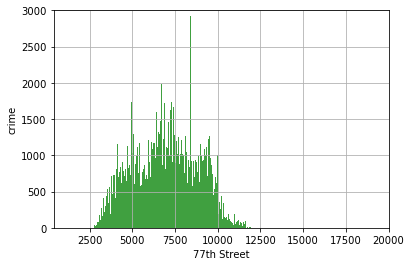

std_dev1 is: 1879.97058475
mean1 is: 6970.69098302


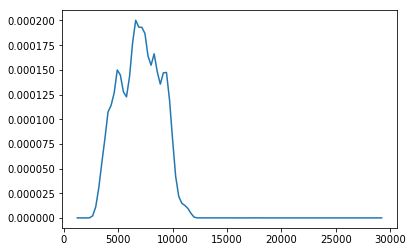

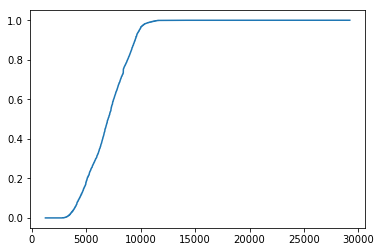

77th Street finished
data :  ['Olympic', '34.044736, -118.264549']
In plot for area

distance
plot for area finished


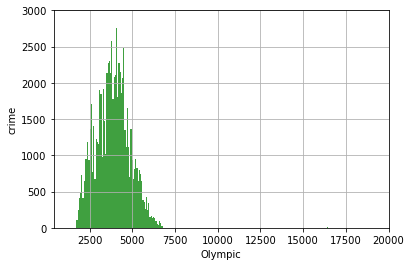

std_dev1 is: 1078.12486692
mean1 is: 3877.94768457


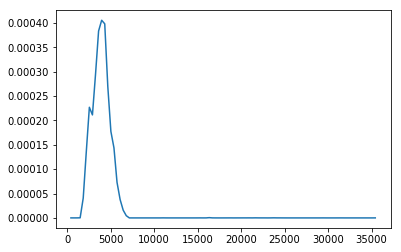

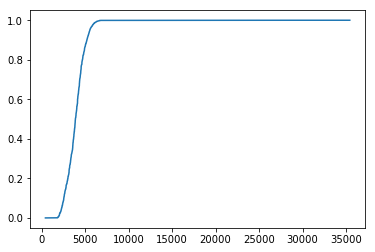

Olympic finished
data :  ['Central', '34.1, -118.333333']
In plot for area

distance
plot for area finished


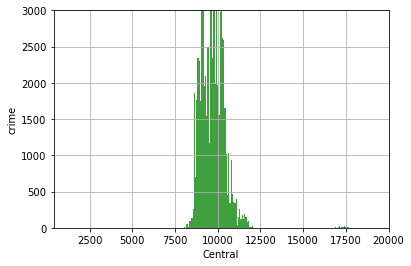

std_dev1 is: 1046.81109137
mean1 is: 9747.13473601


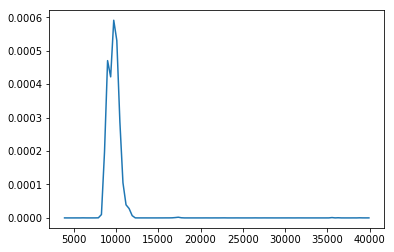

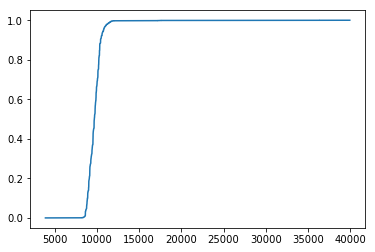

Central finished
data :  ['Southeast', '33.9, -118.166667']
In plot for area

distance
plot for area finished


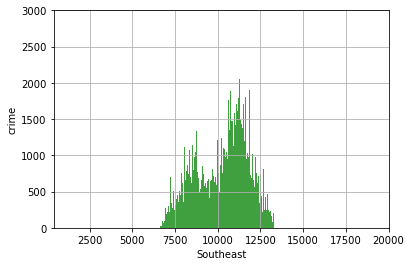

std_dev1 is: 1544.31354115
mean1 is: 10309.8010849


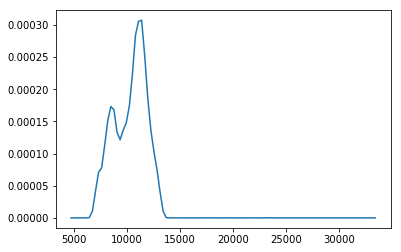

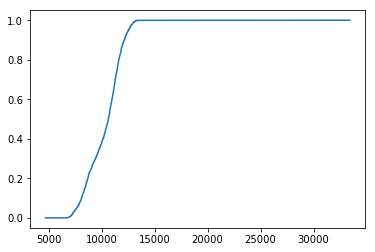

Southeast finished
data :  ['Topanga', '34.045053, -118.563824']
In plot for area

distance
plot for area finished


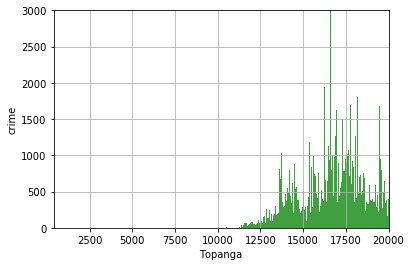

std_dev1 is: 2068.02467436
mean1 is: 16927.2383206


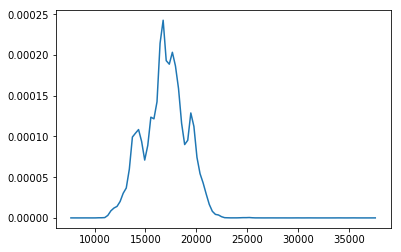

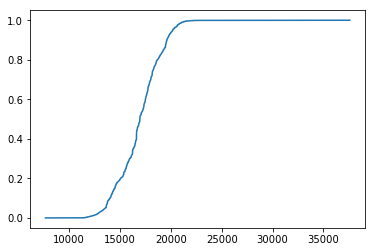

Topanga finished
data :  ['Northeast', '34.11194, -118.19806']
In plot for area

distance
plot for area finished


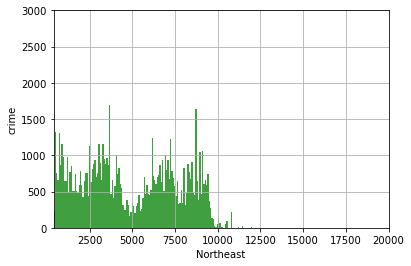

std_dev1 is: 2907.33833312
mean1 is: 4820.35194355


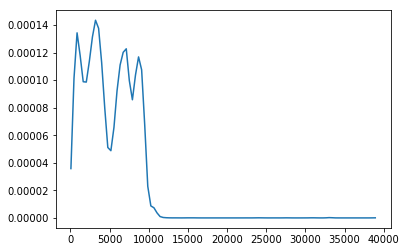

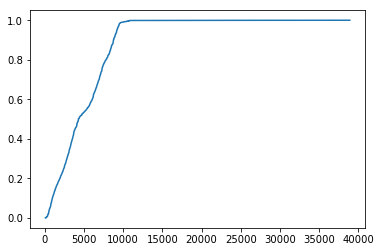

Northeast finished
data :  ['Foothill', '34.140635, -118.044354']
In plot for area

distance
plot for area finished


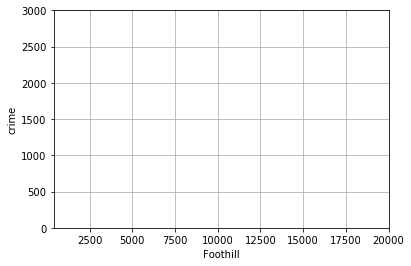

std_dev1 is: 3986.38842453
mean1 is: 33150.0191084


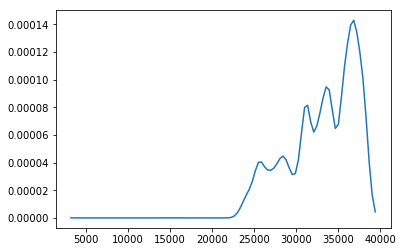

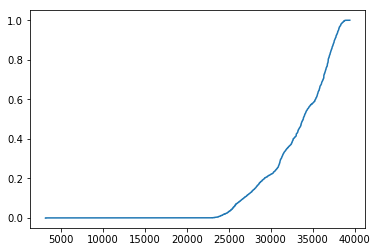

Foothill finished
data :  ['Mission', '34.22472, -118.44889']
In plot for area

distance
plot for area finished


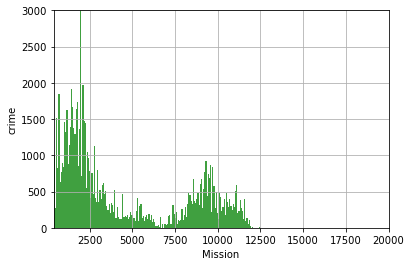

std_dev1 is: 3626.11115979
mean1 is: 4245.66314325


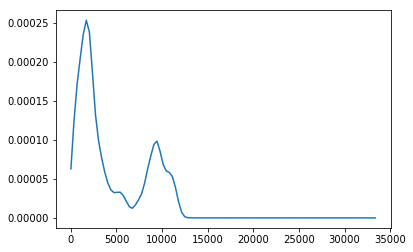

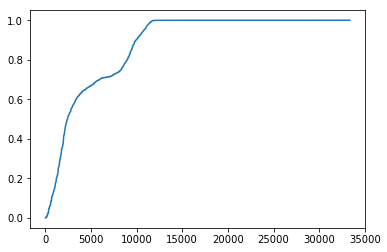

Mission finished
data :  ['Van Nuys', '34.20114, -118.50113']
In plot for area

distance
plot for area finished


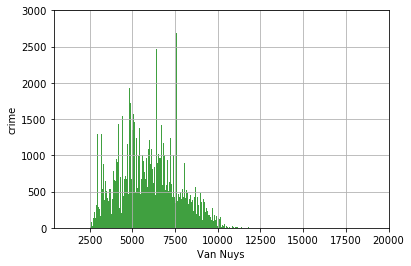

std_dev1 is: 1733.7469074
mean1 is: 5974.81481421


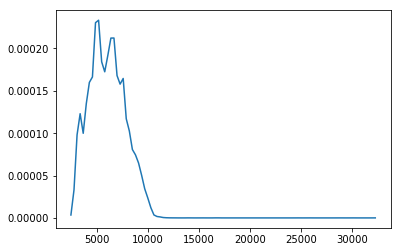

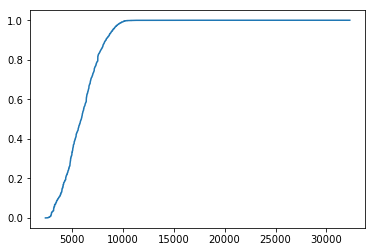

Van Nuys finished
data :  ['Newton', '34.037168, -118.256404']
In plot for area

distance
plot for area finished


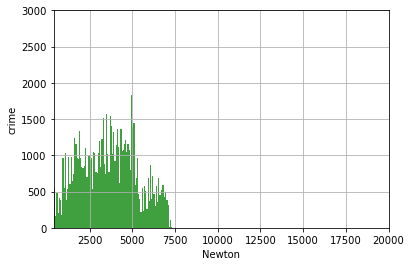

std_dev1 is: 1745.19426148
mean1 is: 3633.26549392


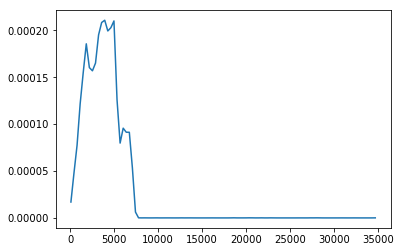

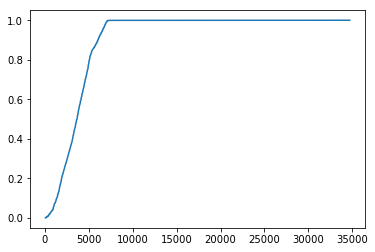

Newton finished
data :  ['Hollywood', '34.136518, -118.356051']
In plot for area

distance
plot for area finished


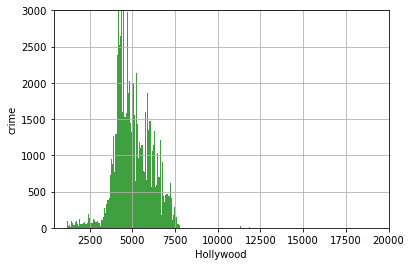

std_dev1 is: 1104.72637411
mean1 is: 5011.6226491


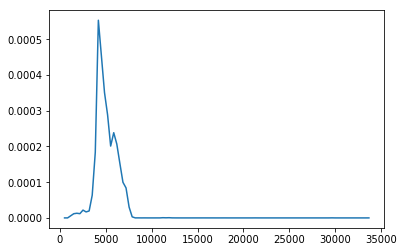

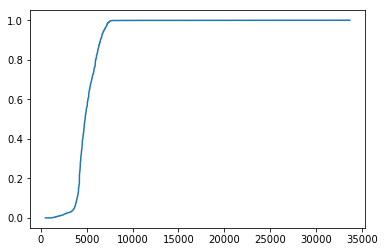

Hollywood finished
data :  ['Rampart', '34.0792, -118.258']
In plot for area

distance
plot for area finished


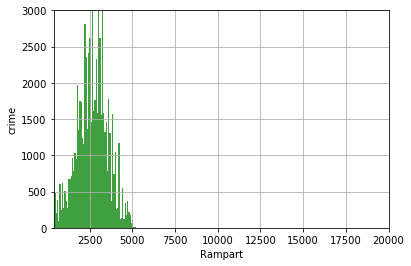

std_dev1 is: 1001.33171417
mean1 is: 2681.95868192


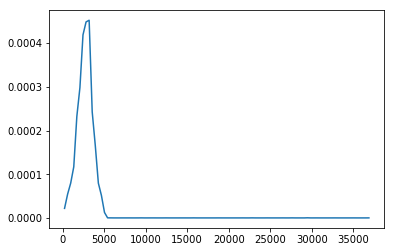

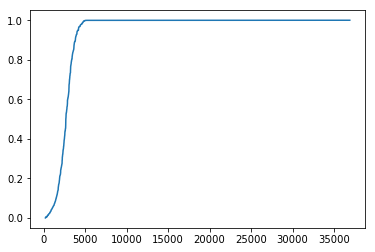

Rampart finished
data :  ['N Hollywood', '34.1919 , -118.4011']
In plot for area

distance
plot for area finished


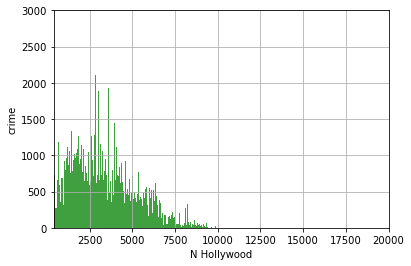

std_dev1 is: 1906.9552857
mean1 is: 3382.25898962


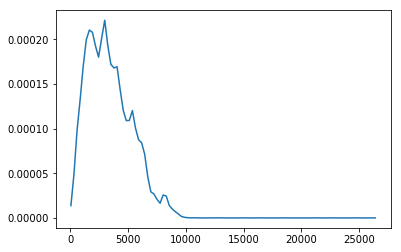

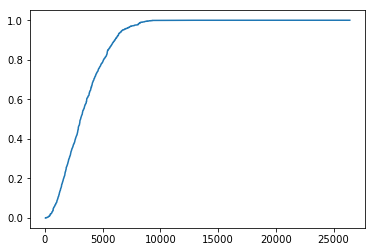

N Hollywood finished
data :  ['West Valley', '34.179084, -118.413782']
In plot for area

distance
plot for area finished


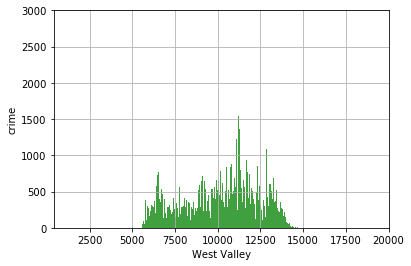

std_dev1 is: 2213.89367757
mean1 is: 10154.3427126


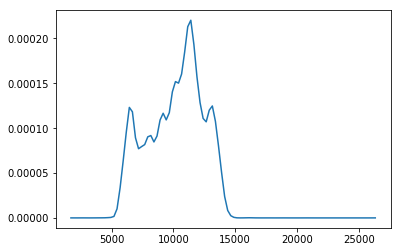

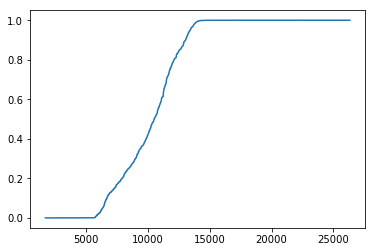

West Valley finished
data :  ['Pacific', '34.042738, -118.55235']
In plot for area

distance
plot for area finished


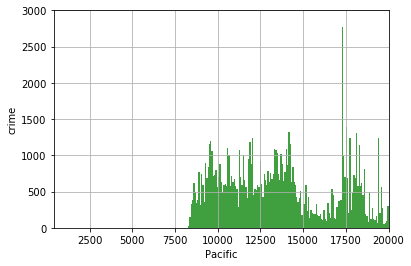

std_dev1 is: 3255.01145565
mean1 is: 13654.5555159


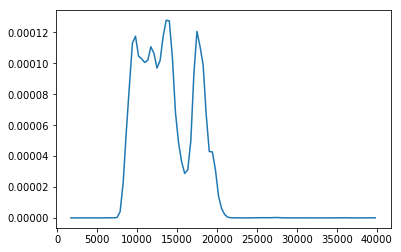

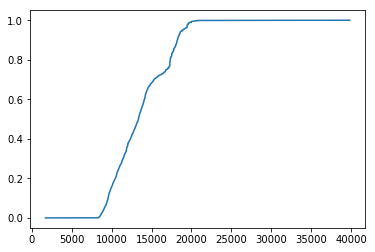

Pacific finished
data :  ['Devonshire', '34.2582, -118.5392']
In plot for area

distance
plot for area finished


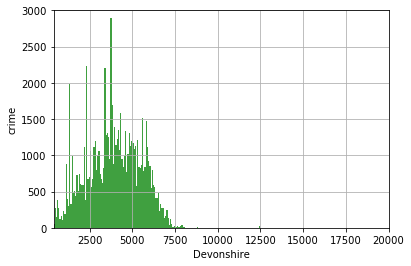

std_dev1 is: 1620.29393603
mean1 is: 3868.83748562


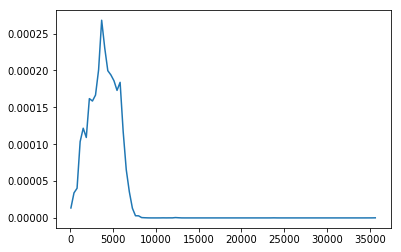

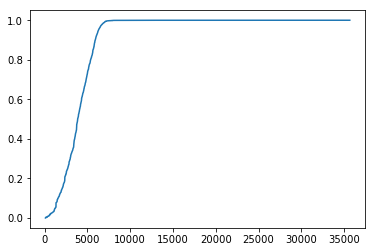

Devonshire finished
data :  ['Harbor', '33.729186, -118.262015']
In plot for area

distance
plot for area finished


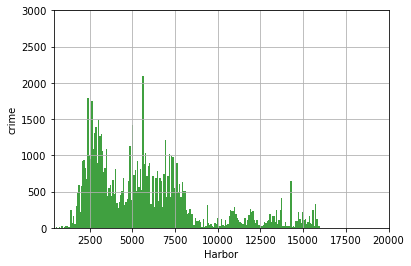

std_dev1 is: 3427.11843731
mean1 is: 5861.79905876


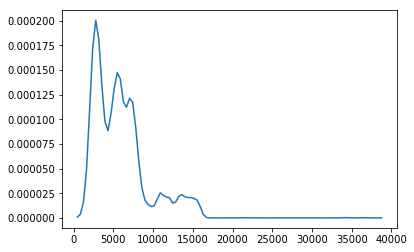

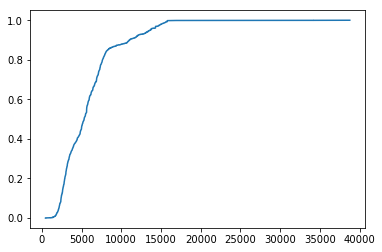

Harbor finished
data :  ['Hollenbeck', '34.039956, -118.21804']
In plot for area

distance
plot for area finished


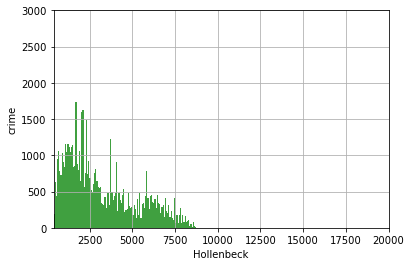

std_dev1 is: 2116.9685341
mean1 is: 3136.69938757


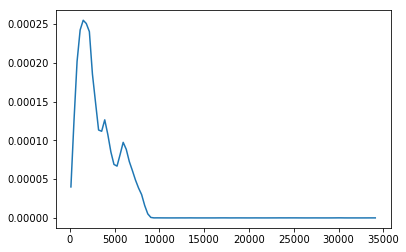

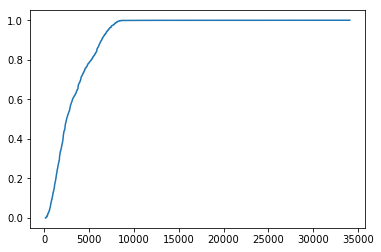

Hollenbeck finished
data :  ['West LA', '34.0380, -118.4532']
In plot for area

distance
plot for area finished


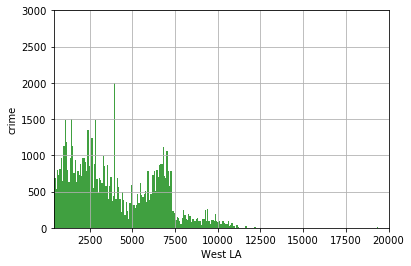

std_dev1 is: 2513.59119674
mean1 is: 3966.7236388


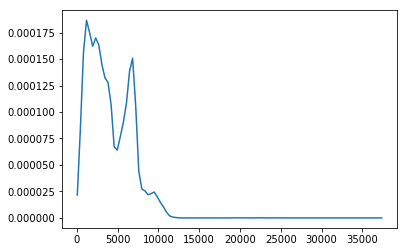

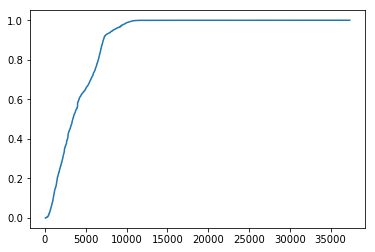

West LA finished
data :  ['Wilshire', '34.05, -118.2593']
In plot for area

distance
plot for area finished


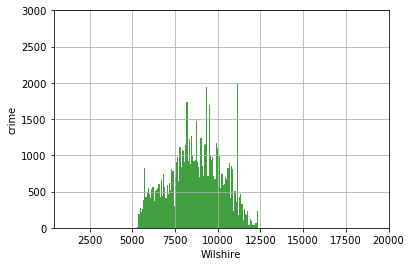

std_dev1 is: 1630.46916075
mean1 is: 8729.78402489


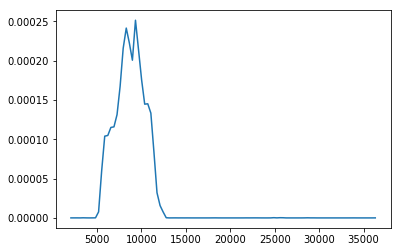

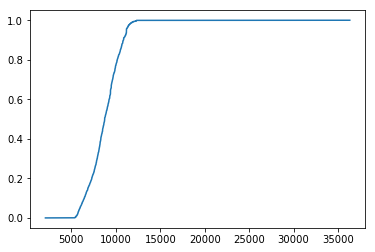

Wilshire finished
[9857.3663616689137, 4513.6657117490786, 4313.7825255093558, 4513.6657117490786, 4934.5771322794062]


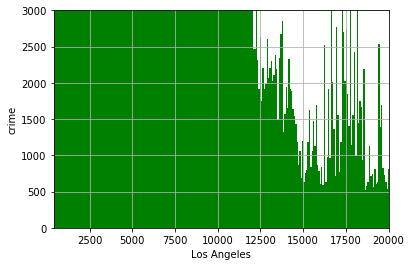

In [20]:
area = ds2["Area Name"]
# area = str(area)
loc = ds2["Location "]
print("length : ", len(loc))
# print("length of ds2 : ",len(ds2))
# print("area length",len(area))
#print("loaction is dchjsgchsdbjchsdb",loc)
# print(ds2["Area Name"])

Data = [["77th Street","33.938739, -118.241047"],["Olympic","34.044736, -118.264549"],["Central","34.1, -118.333333"],["Southeast","33.9, -118.166667"],["Topanga","34.045053, -118.563824"],["Northeast","34.11194, -118.19806"],["Foothill","34.140635, -118.044354"],["Mission","34.22472, -118.44889"],["Van Nuys","34.20114, -118.50113"],["Newton","34.037168, -118.256404"],["Hollywood","34.136518, -118.356051"],["Rampart","34.0792, -118.258"],["N Hollywood","34.1919 , -118.4011"],["West Valley","34.179084, -118.413782"],["Pacific","34.042738, -118.55235"],["Devonshire","34.2582, -118.5392"],["Harbor","33.729186, -118.262015"],["Hollenbeck","34.039956, -118.21804"],["West LA","34.0380, -118.4532"],["Wilshire","34.05, -118.2593"]]

print("starteding process")
total = list()
for data in Data:
    print("data : ", data)
    distance = plot_for_area(data[0],data[1])
    total = total + distance
    print(data[0],"finished")

print(total[:5])
from scipy.interpolate import UnivariateSpline
#from matplotlib import pyplot as plt
import matplotlib.pyplot as pl

pl.xlabel("Los Angeles")
pl.ylabel('crime')
pl.hist(total, bins = 500, facecolor = 'green', alpha = 1)
pl.axis([400, 20000, 0, 3000])
pl.grid(True)
filename = "/Users/santwana/Desktop/testing/Plots1/Final.png"
pl.savefig(filename)
pl.show()


std_dev_total is: 6821.05654153
mean_total is: 7839.41015056
Running KS one Sample test

statistic: 1.0 pvalue : 0.0


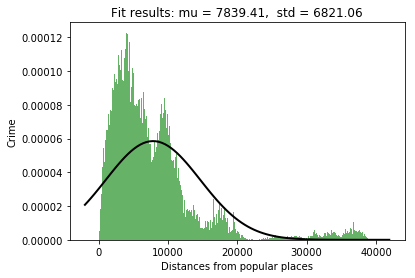

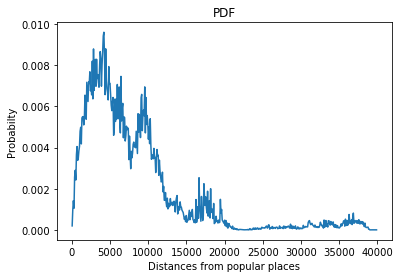

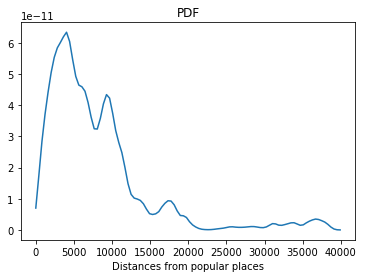

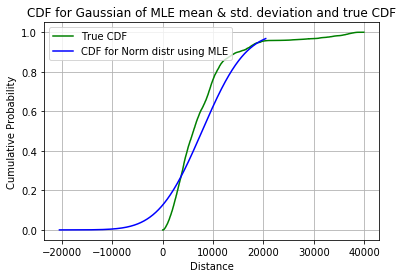

In [21]:
from scipy.interpolate import UnivariateSpline
#from matplotlib import pyplot as plt
import matplotlib.pyplot as pl
from numpy import linspace
import matplotlib.pyplot as plt1

std_dev_total = np.std(total, ddof = 0)
print("std_dev_total is:", std_dev_total)

mean_total = np.mean(total)
print("mean_total is:", mean_total)

from scipy import stats
print("Running KS one Sample test")
print()
statistic, pvalue = stats.kstest(total, 'norm')
print("statistic:",statistic, "pvalue :", pvalue)


# MY orginal CODE
# pl.xlabel("Los Angeles")
# pl.ylabel('crime')
# pl.hist(total, bins = 500, facecolor = 'green', alpha = 1)
# pl.axis([400, 30000, 0, 20000])
# pl.grid(True)
# filename = "/Users/santwana/Desktop/testing/Plots1/Final.png"
# pl.savefig(filename)
# pl.show()

# TRIAL
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt10

# Fit a normal distribution to the data:
mu, std = norm.fit(total)

# Plot the histogram.
plt10.hist(total, bins = 300, normed = True, alpha = 0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt10.plot(x, p, 'k', linewidth = 2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt10.title(title)
filename_1 = "/Users/santwana/Desktop/testing/Plots1/FittedGraph.png"
plt10.savefig(filename_1)
plt10.xlabel("Distances from popular places")
plt10.ylabel('Crime')
plt10.show()





import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
myInt = 1709541
p, x = np.histogram(total, bins =  500) # bin it into n = N//10 bins
x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
f = UnivariateSpline(x, p, s = 1000)
plt.plot(x, f(x)/myInt)

plt.xlabel("Distances from popular places")
plt.ylabel('Probabilty')
plt.title("PDF")
plt.show()

from scipy.stats.kde import gaussian_kde
from numpy import linspace
from matplotlib import pyplot as plts


kde = gaussian_kde( total )
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(total), max(total), 100 )
# plot the results
plts.plot( dist_space, kde(dist_space)/myInt )

filename = "/Users/santwana/Desktop/testing/Plots1/PDF/Final.png"
plts.savefig(filename)
plts.xlabel("Distances from popular places")

plts.title("PDF")
plts.show()



from matplotlib import pyplot as pls
from matplotlib import pyplot as pltcdf
import scipy as sp
from scipy import stats
import pylab 

sorted_total = np.sort(total)
p = 1. * np.arange(len(sorted_total))/(len(sorted_total) - 1)
pls.plot(sorted_total, p, 'g', label='True CDF')
pls.grid(True)
# filename3 = "/Users/santwana/Desktop/testing/Plots1/CDF/Final.png"
# pls.savefig(filename3)
# pls.show()
mean = 7839.41015056
std = 6821.05654153
# 50 numbers between -3σ and 3σ
x = sp.linspace(-3 * std, 3 * std, 5000)
# CDF at these values
y = stats.norm.cdf(x, loc = mean, scale = std)
pls.plot(x,y, color = "blue", label='CDF for Norm distr using MLE')
pls.xlabel("Distance")
pls.ylabel("Cumulative Probability")
# pls.axis([0, 40000, 0, 1])
pls.title("CDF for Gaussian of MLE mean & std. deviation and true CDF".format(mean, std))
pylab.legend(loc = 'upper left')
filenamecdf = "/Users/santwana/Desktop/testing/Plots1/CDF/Comparison.png"
pls.savefig(filenamecdf)
pls.show()